In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
data = pd.read_excel('/content/DATA RUMAH.xlsx')

In [5]:
data

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [6]:
data['HARGA(JT)'] = data['HARGA']//1000000

In [7]:
data.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,HARGA(JT)
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,3800
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,4600
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,3000
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,430
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,9000


<Axes: xlabel='GRS', ylabel='HARGA(JT)'>

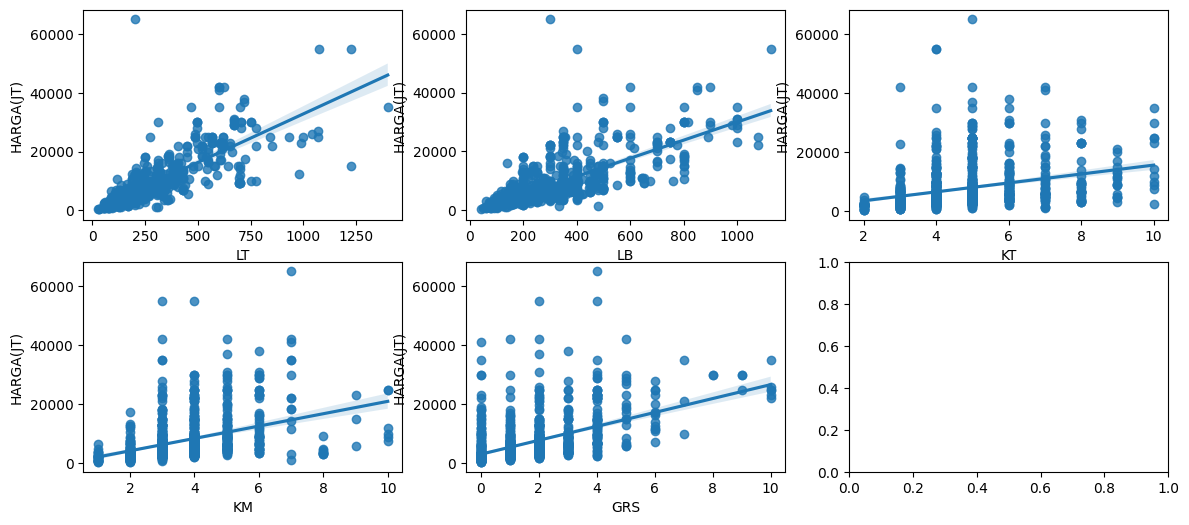

In [8]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14, 6), dpi=100)
sns.regplot(data=data, x="LT", y="HARGA(JT)", ax=axs[0][0])
sns.regplot(data=data, x="LB", y="HARGA(JT)", ax=axs[0][1])
sns.regplot(data=data, x="KT", y="HARGA(JT)", ax=axs[0][2])
sns.regplot(data=data, x="KM", y="HARGA(JT)", ax=axs[1][0])
sns.regplot(data=data, x="GRS", y="HARGA(JT)", ax=axs[1][1])

In [9]:
# kita cari tahu dulu harga termurah dan termahal dari properti
data_without_no_and_price = data.drop(columns=['NO', 'NAMA RUMAH', 'HARGA'], inplace=False)
data_without_no_and_price.describe()

,LB,LT,KT,KM,GRS,HARGA(JT)
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7628.982178
std,177.864557,179.957604,1.572776,1.420066,1.510998,7340.945285
min,40.000000,25.000000,2.000000,1.000000,0.000000,430.000000
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3262.500000
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5000.000000
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9000.000000
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,65000.000000


In [10]:
min_price = data_without_no_and_price['HARGA(JT)'].min()
max_price = data_without_no_and_price['HARGA(JT)'].max()
q = data_without_no_and_price['HARGA(JT)'].quantile([.25, .5, .75])
q

0.25    3262.5
0.50    5000.0
0.75    9000.0
Name: HARGA(JT), dtype: float64

In [11]:
low_price_house = data_without_no_and_price.loc[data_without_no_and_price['HARGA(JT)'] <= q[0.25]]
mid_price_house = data_without_no_and_price.loc[(data_without_no_and_price['HARGA(JT)'] > q[0.25]) & (data_without_no_and_price['HARGA(JT)'] <= q[0.50])]
high_price_house = data_without_no_and_price.loc[data_without_no_and_price['HARGA(JT)'] > q[0.50]]

([<matplotlib.patches.Wedge at 0x7f86fd0500a0>,
 [Text(0.7766068309123683, 0.7790262063501129, 'Harga Rendah'),
  Text(-0.8189838062989407, 0.7343470058630996, 'Harga Menengah'),
  Text(0.05813885738749492, -1.0984625042584188, 'Harga Tinggi')],
 [Text(0.4236037259522008, 0.42492338528187973, '25%'),
  Text(-0.44671843979942216, 0.40055291228896345, '27%'),
  Text(0.03171210402954268, -0.5991613659591375, '48%')])

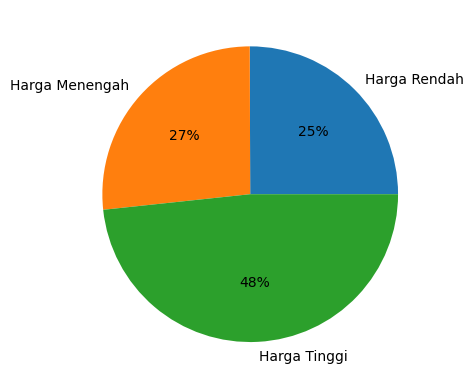

In [12]:
plt.pie([len(low_price_house), len(mid_price_house), len(high_price_house)], labels = ['Harga Rendah', 'Harga Menengah', 'Harga Tinggi'], autopct='%.0f%%')

In [13]:
def group_by_price_category(price):
    if(price <= q[0.25]):
        return 'Harga Rendah'
    elif(price > q[0.25] and price  <= q[0.50]):
        return 'Harga Menegah'
    elif(price > q[0.50]):
        return 'Harga Tinggi'
    else:
        return '-'

data_with_price_grouping = data.copy()
data_with_price_grouping['KELAS HARGA'] = data_with_price_grouping['HARGA(JT)'].apply(group_by_price_category)
data_with_price_grouping.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,HARGA(JT),KELAS HARGA
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,3800,Harga Menegah
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,4600,Harga Menegah
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,3000,Harga Rendah
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,430,Harga Rendah
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,9000,Harga Tinggi


<Axes: xlabel='HARGA(JT)', ylabel='GRS'>

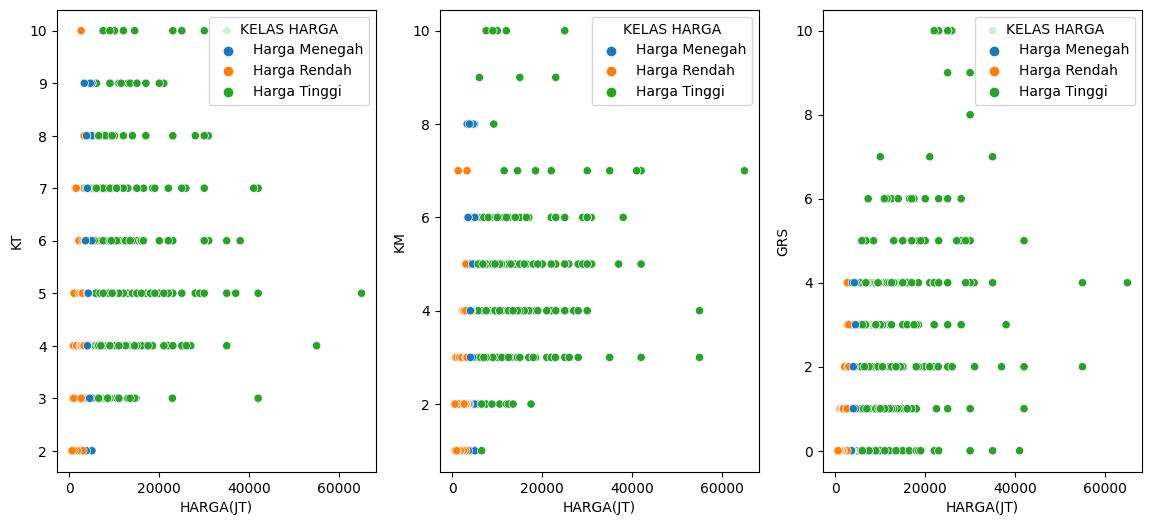

In [14]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 6), dpi=100)
sns.scatterplot(data=data_with_price_grouping, x="HARGA(JT)", y="KT", hue="KELAS HARGA", ax=axs[0])
sns.scatterplot(data=data_with_price_grouping, x="HARGA(JT)", y="KM", hue="KELAS HARGA", ax=axs[1])
sns.scatterplot(data=data_with_price_grouping, x="HARGA(JT)", y="GRS", hue="KELAS HARGA", ax=axs[2])

In [15]:
price_kt = data[['HARGA(JT)', 'KT']]
price_km = data[['HARGA(JT)', 'KM']]
price_grs = data[['HARGA(JT)', 'GRS']]

In [16]:
# Pearson method
pearson_corr_price_vs_kt = price_kt.corr(method='pearson')['HARGA(JT)']['KT']
pearson_corr_price_vs_km = price_km.corr(method='pearson')['HARGA(JT)']['KM']
pearson_corr_price_vs_grs = price_grs.corr(method='pearson')['HARGA(JT)']['GRS']

# Kendall method
kendall_corr_price_vs_kt = price_kt.corr(method='kendall')['HARGA(JT)']['KT']
kendall_corr_price_vs_km = price_km.corr(method='kendall')['HARGA(JT)']['KM']
kendall_corr_price_vs_grs = price_grs.corr(method='kendall')['HARGA(JT)']['GRS']

# Spearman method
spearman_corr_price_vs_kt = price_kt.corr(method='spearman')['HARGA(JT)']['KT']
spearman_corr_price_vs_km = price_km.corr(method='spearman')['HARGA(JT)']['KM']
spearman_corr_price_vs_grs = price_grs.corr(method='spearman')['HARGA(JT)']['GRS']

correlation_comparasion = pd.DataFrame({
    'item': ['HARGA vs KT', 'HARGA vs KM', 'HARGA vs GRS'],
    'pearson': [pearson_corr_price_vs_kt, pearson_corr_price_vs_km, pearson_corr_price_vs_grs],
    'kendall': [kendall_corr_price_vs_kt, kendall_corr_price_vs_km, kendall_corr_price_vs_grs],
    'spearman': [spearman_corr_price_vs_kt, spearman_corr_price_vs_km, spearman_corr_price_vs_grs],
})
correlation_comparasion

,item,pearson,kendall,spearman
0,HARGA vs KT,0.323320,0.362457,0.477077
1,HARGA vs KM,0.404770,0.424793,0.547344
2,HARGA vs GRS,0.484892,0.381156,0.476176


In [17]:
price_lt = data[['HARGA(JT)', 'LT']]
price_lb = data[['HARGA(JT)', 'LB']]

In [18]:
# Pearson method
pearson_corr_price_vs_lt = price_lt.corr(method='pearson')['HARGA(JT)']['LT']
pearson_corr_price_vs_lb = price_lb.corr(method='pearson')['HARGA(JT)']['LB']

# Kendall method
kendall_corr_price_vs_lt = price_lt.corr(method='kendall')['HARGA(JT)']['LT']
kendall_corr_price_vs_lb = price_lb.corr(method='kendall')['HARGA(JT)']['LB']

# Spearman method
spearman_corr_price_vs_lt = price_kt.corr(method='spearman')['HARGA(JT)']['KT']
spearman_corr_price_vs_lb = price_km.corr(method='spearman')['HARGA(JT)']['KM']

correlation_comparasion = pd.DataFrame({
    'item': ['HARGA vs LT', 'HARGA vs LB'],
    'pearson': [pearson_corr_price_vs_lt, pearson_corr_price_vs_lb],
    'kendall': [kendall_corr_price_vs_lt, kendall_corr_price_vs_lb],
    'spearman': [spearman_corr_price_vs_lt, spearman_corr_price_vs_lb],
})
correlation_comparasion

,item,pearson,kendall,spearman
0,HARGA vs LT,0.809617,0.664847,0.477077
1,HARGA vs LB,0.747083,0.631357,0.547344


In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data[['LT', 'LB']], data['HARGA(JT)'], test_size=0.3, random_state=0)

In [21]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 100, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 3))}]

# step-3: perform grid search
# 3.1 specify model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 100 folds for each of 2 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=100, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2]}],
             return_train_score=True, scoring='r2', verbose=1)

In [22]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.010635,0.006937,0.004099,0.003520,1,{'n_features_to_select': 1},0.893714,0.788059,0.731575,0.693737,...,0.678071,0.678845,0.675664,0.677554,0.678009,0.677272,0.678108,0.675696,0.678437,0.003129
1,0.006149,0.005048,0.003578,0.004066,2,{'n_features_to_select': 2},0.891969,0.601596,0.713399,0.840044,...,0.716567,0.718095,0.714548,0.716655,0.717428,0.716309,0.718762,0.713528,0.717558,0.002490


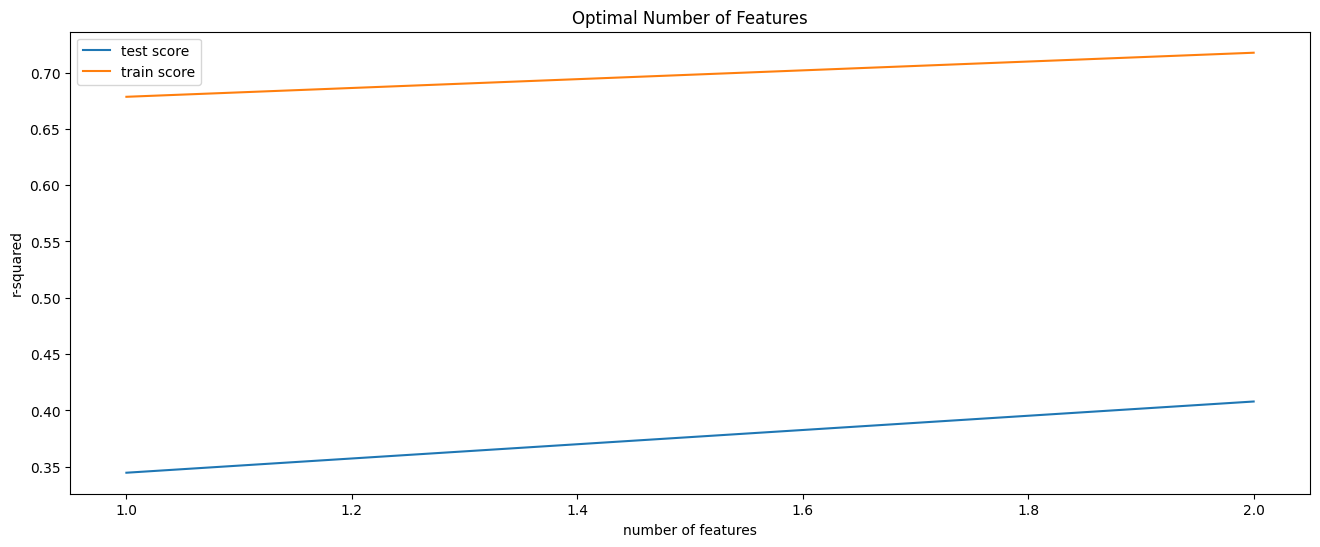

In [23]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')